In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
skip = sorted(random.sample(range(2,194673),180000))

In [3]:
df = pd.read_csv("dataset/Data-Collisions.csv",skiprows=skip)

In [4]:
feature=["SEVERITYCODE","COLLISIONTYPE","PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","VEHCOUNT","WEATHER","ROADCOND","LIGHTCOND","JUNCTIONTYPE","SPEEDING","UNDERINFL"]

In [5]:
df = df[feature]

In [6]:
df.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,SPEEDING,UNDERINFL
0,2,Angles,2,0,0,2,Overcast,Wet,Daylight,At Intersection (intersection related),No,N
1,1,Parked Car,2,0,0,2,Clear,Dry,Daylight,Mid-Block (not related to intersection),No,0
2,1,Other,2,0,0,2,Overcast,Dry,Daylight,Driveway Junction,No,0
3,2,Rear Ended,3,0,0,2,Clear,Dry,Daylight,At Intersection (intersection related),Yes,N
4,1,Other,2,0,0,2,Clear,Dry,Daylight,Mid-Block (not related to intersection),No,N


In [7]:
df.describe()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,14673.000000,14673.000000,14673.000000,14673.000000,14673.000000
mean,1.290261,2.426975,0.035984,0.026443,1.923601
std,0.453898,1.250627,0.192732,0.161302,0.628377
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,2.000000
50%,1.000000,2.000000,0.000000,0.000000,2.000000
75%,2.000000,3.000000,0.000000,0.000000,2.000000
max,2.000000,47.000000,3.000000,2.000000,8.000000


In [8]:
df.shape

(14673, 12)

In [9]:
[df[col].isnull().value_counts() for col in df.columns ]

[False    14673
 Name: SEVERITYCODE, dtype: int64,
 False    14322
 True       351
 Name: COLLISIONTYPE, dtype: int64,
 False    14673
 Name: PERSONCOUNT, dtype: int64,
 False    14673
 Name: PEDCOUNT, dtype: int64,
 False    14673
 Name: PEDCYLCOUNT, dtype: int64,
 False    14673
 Name: VEHCOUNT, dtype: int64,
 False    14310
 True       363
 Name: WEATHER, dtype: int64,
 False    14311
 True       362
 Name: ROADCOND, dtype: int64,
 False    14300
 True       373
 Name: LIGHTCOND, dtype: int64,
 False    14170
 True       503
 Name: JUNCTIONTYPE, dtype: int64,
 False    14673
 Name: SPEEDING, dtype: int64,
 False    14323
 True       350
 Name: UNDERINFL, dtype: int64]

In [10]:
y = df["SEVERITYCODE"]
df.drop(["SEVERITYCODE"],axis=1,inplace=True)

X_train,X_valid,y_train,y_valid = train_test_split(df,y,test_size=0.2,random_state=0)

categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 15 and 
                    X_train[cname].dtype == "object"]


numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

combined_cols = categorical_cols+numerical_cols

In [11]:
X_train = X_train[combined_cols].copy()
X_valid = X_valid[combined_cols].copy()

In [12]:
numerical_transformer = SimpleImputer(strategy="mean")
categorical_transformer = Pipeline(steps=[("Imputer",SimpleImputer(strategy="most_frequent")),
                                         ("OneHot",OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(transformers=[("numerical",numerical_transformer,numerical_cols),
                              ("categorical",categorical_transformer,categorical_cols)])

In [13]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

In [14]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
sm = SVC(probability=True)
lr = LogisticRegression()
xgbc = XGBClassifier()

In [15]:
def models(model):
    print("\nModel is :",model)
    final_model = model
    final_model.fit(X_train,y_train)
    prediction = final_model.predict(X_valid).round().astype(int) 
    lrprediction = final_model.predict_proba(X_valid).round().astype(int) 
    mae=mean_absolute_error(y_valid,prediction)
    print("    mae : ",mae)
    acc=accuracy_score(y_valid,prediction)
    print("    accuracy : ",acc)
    js = jaccard_score(y_valid,prediction)
    print("    jaccard score : ",js)
    f1score = f1_score(y_valid,prediction,average="weighted")
    print("    f1 score : ",f1score)
    logscore = log_loss(y_valid,lrprediction)
    print("    log loss score  : ",logscore)
    print(" ")
    fig = plt.figure(figsize=(10,6))
    sns.distplot(y_valid, hist=True, rug=True)
    sns.distplot(prediction, hist=True, rug=True)
    fig.legend(labels=['Actual','Predicted'])


Model is : KNeighborsClassifier()
    mae :  0.2695059625212947
    accuracy :  0.7304940374787052
    jaccard score :  0.6960030745580322
    f1 score :  0.7170506391621004
    log loss score  :  9.308406176618178
 


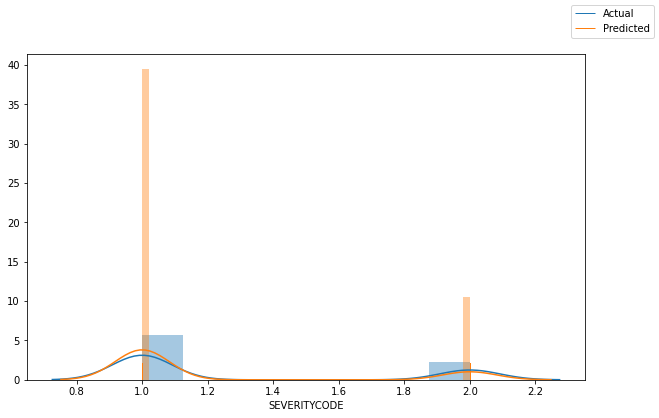


Model is : RandomForestClassifier()
    mae :  0.2592844974446337
    accuracy :  0.7407155025553662
    jaccard score :  0.7100952380952381
    f1 score :  0.7216717775296441
    log loss score  :  8.955369279906995
 


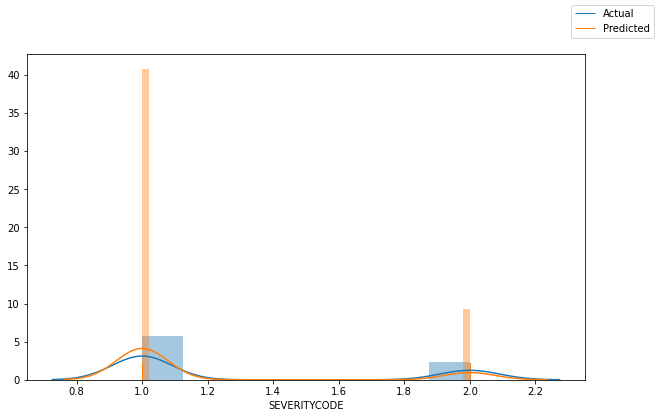


Model is : SVC(probability=True)
    mae :  0.23202725724020443
    accuracy :  0.7679727427597955
    jaccard score :  0.7494481236203091
    f1 score :  0.7234484721603246
    log loss score  :  7.9202667148674655
 


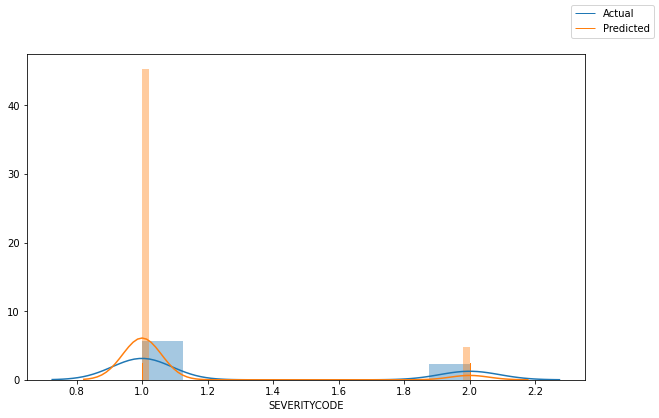


Model is : LogisticRegression()
    mae :  0.23168654173764908
    accuracy :  0.768313458262351
    jaccard score :  0.746173945502053
    f1 score :  0.73340676099098
    log loss score  :  8.002169658786801
 


/home/cn7/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


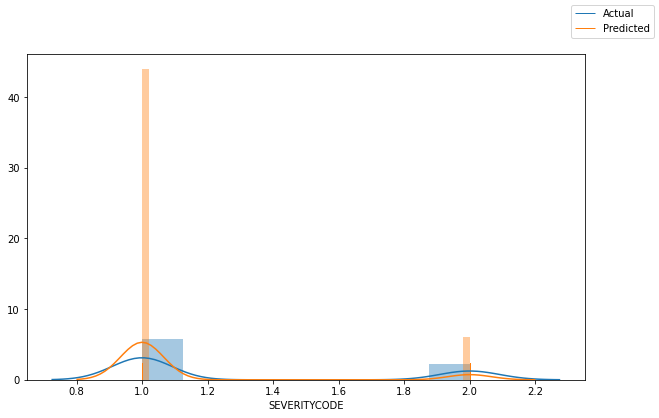


Model is : XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
    mae :  0.23952299829642248
    accuracy :  0.7604770017035775
    jaccard score :  0.7335102350265352
    f1 score :  0.7355390207102481
    log loss score  :  8.272831279598709
 


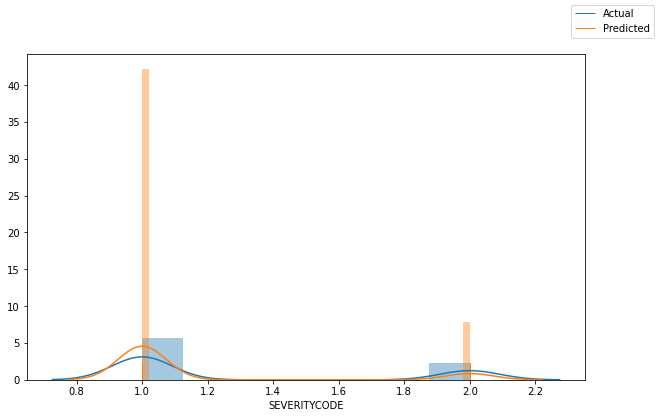

[None, None, None, None, None]

In [16]:
[models(model) for model in [knn,rf,sm,lr,xgbc]]